The following examples are from the Udacity course Data Analyst on Visualization

# Bar Chart Practice

In workspaces like this one, you will be able to practice visualization techniques you've seen in the course materials. In this particular workspace, you'll practice creating single-variable plots for categorical data.

In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In this workspace, you'll be working with this dataset comprised of attributes of creatures in the video game series Pokémon. The data was assembled from the database of information found in [this GitHub repository](https://github.com/veekun/pokedex/tree/master/pokedex/data/csv).

In [2]:
pokemon = pd.read_csv('data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: There have been quite a few Pokémon introduced over the series' history. How many were introduced in each generation? Create a _bar chart_ of these frequencies using the 'generation_id' column.

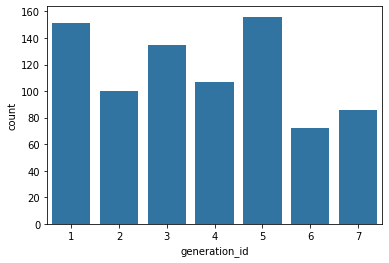

In [3]:
color = sb.color_palette()[0]
sb.countplot(pokemon.generation_id, color = color);

**Task 2**: Each Pokémon species has one or two 'types' that play a part in its offensive and defensive capabilities. How frequent is each type? The code below creates a new dataframe that puts all of the type counts in a single column.

In [4]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


Your task is to use this dataframe to create a _relative frequency_ plot of the proportion of Pokémon with each type, _sorted_ from most frequent to least. **Hint**: The sum across bars should be greater than 100%, since many Pokémon have two types. Keep this in mind when considering a denominator to compute relative frequencies.

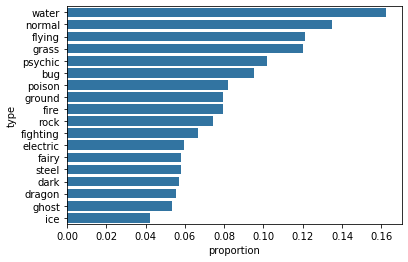

In [5]:
total = pokemon.shape[0]
values = pkmn_types.type.value_counts() / total
color = sb.color_palette()[0]
sb.barplot(values, values.index, color = color)
plt.xlabel('proportion')
plt.ylabel('type');

# Histogram Practice

**Task**: Pokémon have a number of different statistics that describe their combat capabilities. Here, create a _histogram_ that depicts the distribution of 'special-defense' values taken. **Hint**: Try playing around with different bin width sizes to see what best depicts the data.

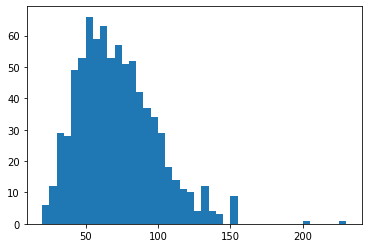

In [6]:
bins = np.arange(pokemon['special-defense'].min(), pokemon['special-defense'].max()+5, 5 )
plt.hist(data = pokemon, x = 'special-defense', bins = bins);

# Scales and Transformation Practice

**Task 1**: There are also variables in the dataset that don't have anything to do with the game mechanics, and are just there for flavor. Try plotting the distribution of Pokémon heights (given in meters). For this exercise, experiment with different axis limits as well as bin widths to see what gives the clearest view of the data.

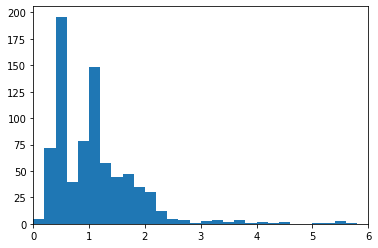

In [7]:
bins = np.arange(0, pokemon.height.max()+0.2, 0.2)
plt.hist(data = pokemon, x = 'height', bins = bins)
plt.xlim((0,6));

**Task 2**: In this task, you should plot the distribution of Pokémon weights (given in kilograms). Due to the very large range of values taken, you will probably want to perform an _axis transformation_ as part of your visualization workflow.

In [8]:
np.log10(pokemon.weight.describe())

count    2.906874
mean     1.790786
std      2.047350
min     -1.000000
25%      0.954243
50%      1.431364
75%      1.799341
max      2.999957
Name: weight, dtype: float64

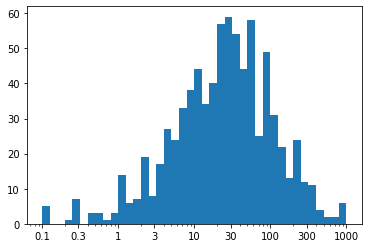

In [9]:
bins = 10 ** np.arange(-1, np.log10(pokemon.weight.max())+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = pokemon, x = 'weight', bins = bins)
plt.xscale('log')
plt.xticks(ticks, labels);

# Scatterplot Practice

In [10]:
fuel_econ = pd.read_csv('data/fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


**Task 1**: Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). Use a _scatter plot_ to depict the data. What is the general relationship between these variables? Are there any points that appear unusual against these trends?

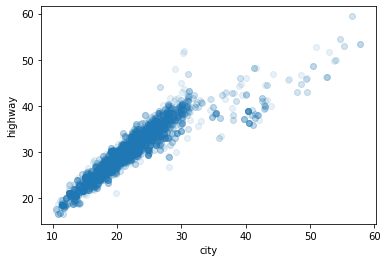

In [11]:
sb.regplot(data = fuel_econ, x = 'city', y = 'highway', scatter_kws = {'alpha' : 0.1}, fit_reg = False);

**Task 2**: Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). Use a heat map to depict the data. How strong is this trend?

In [12]:
fuel_econ.describe()

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
count,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000,3929.000000
mean,36006.724357,2015.500891,5.468313,2.950573,23.660982,59.239247,21.830462,28.044011,29.973842,42.850295,24.791339,376.564266,5.668872,5.659201
std,2189.349923,1.694775,1.878319,1.305901,37.724901,48.667549,6.246273,9.087195,5.747571,9.100423,6.003246,92.338892,1.755860,1.754589
min,32204.000000,2013.000000,2.000000,0.600000,0.000000,0.000000,10.540200,12.900000,16.559400,21.800000,12.821700,29.000000,1.000000,1.000000
25%,34087.000000,2014.000000,4.000000,2.000000,0.000000,0.000000,17.746900,22.200000,25.754200,36.000000,20.658100,315.000000,5.000000,5.000000
50%,36020.000000,2015.000000,5.000000,2.500000,0.000000,91.000000,20.823200,26.400000,29.633800,42.200000,24.000000,369.000000,5.000000,5.000000
75%,37935.000000,2017.000000,6.000000,3.600000,70.000000,100.000000,24.981400,32.264800,33.773100,48.900000,28.227100,429.000000,7.000000,7.000000
max,39901.000000,2018.000000,12.000000,7.000000,102.000000,127.000000,57.808800,83.559800,59.416900,79.100000,57.782400,692.000000,10.000000,10.000000


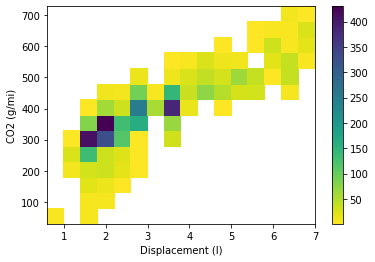

In [13]:
bins_x = np.arange(0.6, 7+0.4, 0.4)
bins_y = np.arange(29, 692+50, 50)
plt.hist2d(data = fuel_econ, x = 'displ', y = 'co2', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin= 0.5)
plt.colorbar()
plt.xlabel('Displacement (l)')
plt.ylabel('CO2 (g/mi)');

# Violin and Box Plot Practice

**Task**: What is the relationship between the size of a car and the size of its engine? The cars in this dataset are categorized into one of five different vehicle classes based on size. Starting from the smallest, they are: {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, and Large Cars}. The vehicle classes can be found in the 'VClass' variable, while the engine sizes are in the 'displ' column (in liters). **Hint**: Make sure that the order of vehicle classes makes sense in your plot!

In [14]:
vclass = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered= True, categories= vclass)
fuel_econ.VClass = fuel_econ.VClass.astype(vclasses)

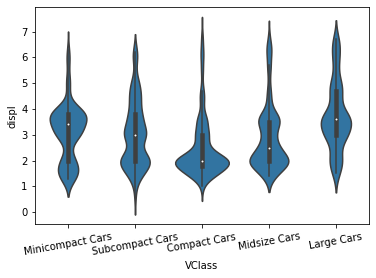

In [15]:
color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', color = color);
plt.xticks(rotation = 10);

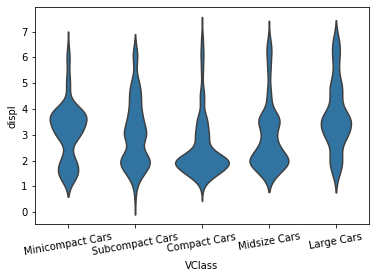

In [16]:
#inner = None for no boxplots in the violin charts
color = sb.color_palette()[0]
sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', color = color, inner = None);
plt.xticks(rotation = 10);

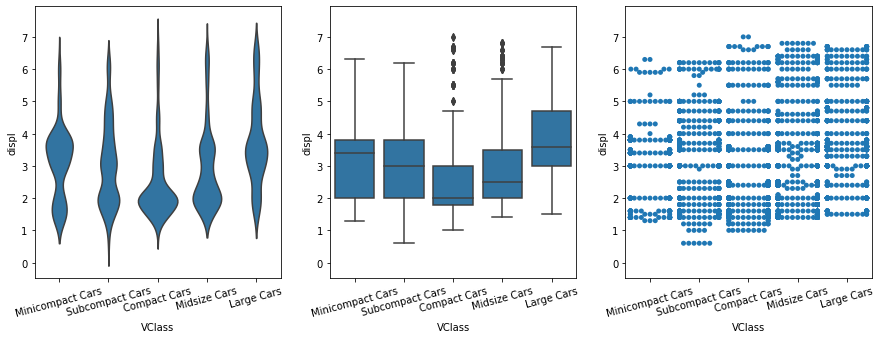

In [17]:
plt.figure(figsize = [15, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
ax1 = sb.violinplot(data = fuel_econ, x = 'VClass', y = 'displ', color = color, inner = None)
plt.xticks(rotation = 15)

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data = fuel_econ, x = 'VClass', y = 'displ', color = color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15)

# right plot: swarm plot
plt.subplot(1, 3, 3)
sb.swarmplot(data = fuel_econ, x = 'VClass', y = 'displ', color = color)
plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot
plt.xticks(rotation = 15);

# Categorical Plot Practice

**Task**: Use a plot to explore whether or not there differences in recommended fuel type depending on the vehicle class. Only investigate the difference between the two main fuel types found in the 'fuelType' variable: Regular Gasoline and Premium Gasoline. (The other fuel types represented in the dataset are of much lower frequency compared to the main two, that they'll be more distracting than informative.) **Note**: The dataset as provided does not retain any of the sorting of the 'VClass' variable, so you will also need to copy over any code you used previously to sort the category levels.

In [18]:
vclass = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories= vclass)
fuel_econ.VClass = fuel_econ.VClass.astype(vclasses)

In [19]:
fueldata = fuel_econ.query('fuelType == "Premium Gasoline" | fuelType == "Regular Gasoline"')


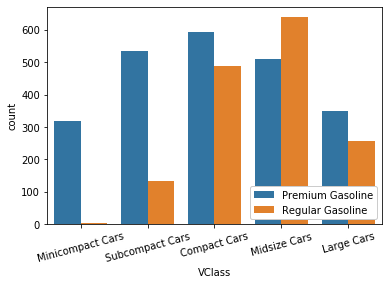

In [20]:
ax = sb.countplot(data = fueldata, x = 'VClass', hue = 'fuelType')
ax.legend(loc = 4, framealpha = 1)
plt.xticks(rotation = 15);

# Additional Plot Practice

**Task 1**: Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. **Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [21]:
make = fuel_econ.make.value_counts()

In [22]:
idx = np.sum(make > 80)

In [23]:
make80 = make.index[:idx]

In [24]:
fuel = fuel_econ.loc[fuel_econ.make.isin(make80)]

In [25]:
comb_means = fuel.groupby('make').comb.mean()
order = comb_means.sort_values(ascending = False).index

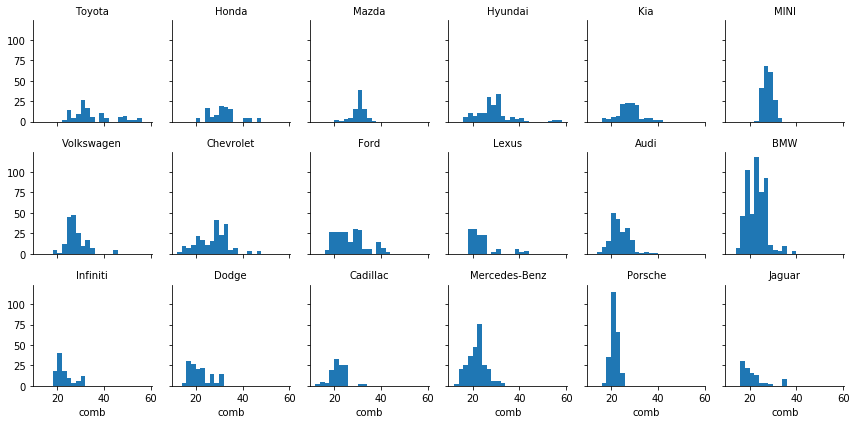

In [26]:
plot = sb.FacetGrid(data = fuel, col = 'make', col_wrap = 6, height = 2, col_order = order)
plot.map(plt.hist, 'comb', bins = np.arange(12, fuel['comb'].max()+2, 2))
plot.set_titles('{col_name}');

**Task 2**: Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.

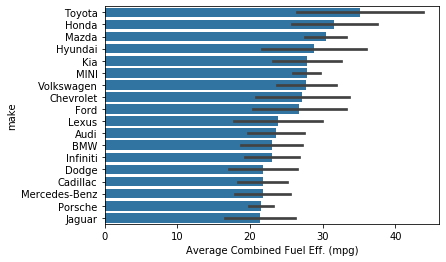

In [27]:
color = sb.color_palette()[0]
sb.barplot(data = fuel, x = 'comb', y = 'make', color = color, order = order, ci = 'sd')
plt.xlabel('Average Combined Fuel Eff. (mpg)');

# Ridgeline Plots
(taken from the course Extra: Ridgeline Plots and used on the data from above)

`FacetGrid` and `set_titles` change "col" to "row", also removing "col_wrap". The "size" and "aspect" dimensions have also been adjusted for the large vertical stacking of facets. The `map` function changes to `kdeplot` and removes "bins", adding the "shade" parameter in its place.

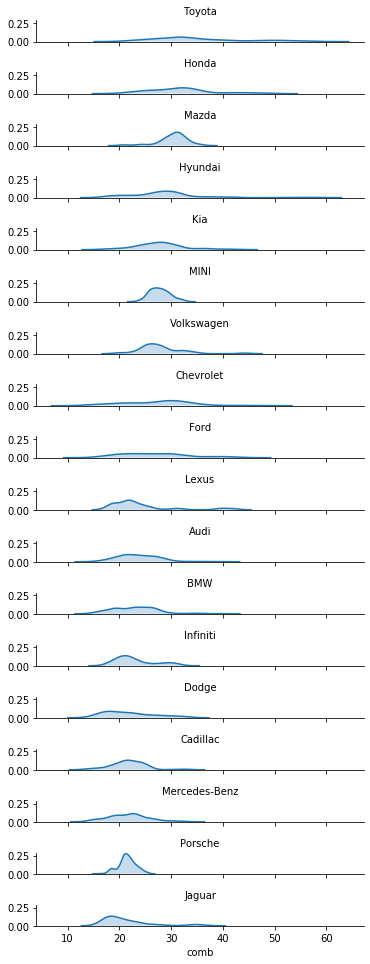

In [28]:
g = sb.FacetGrid(data = fuel, row = 'make', height = 0.75, aspect = 7, row_order = order)
g.map(sb.kdeplot, 'comb', shade = True)
g.set_titles('{row_name}');

Now we've got all of the group distributions stacked on top of one another for a uni-dimensional comparison, but the plot's still pretty tall. Next, we'll create some overlap between the individual subplots.

F:\Anaconda3\envs\py3\lib\site-packages\seaborn\axisgrid.py:388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
F:\Anaconda3\envs\py3\lib\site-packages\seaborn\axisgrid.py:861: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


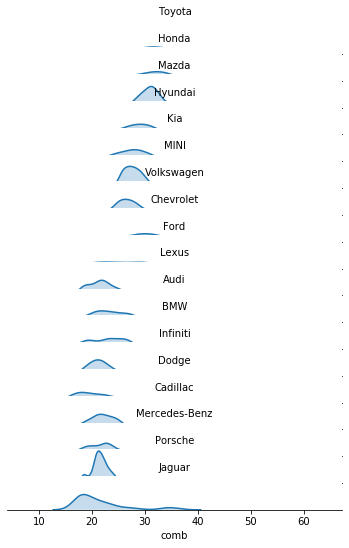

In [29]:
# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = fuel, row = 'make', height = 0.5, aspect = 12, row_order = order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'comb', shade = True)

# remove the y-axes
g.set(yticks=[])
g.despine(left=True)

g.set_titles('{row_name}');

I've added the "gridspec_kws" parameter to the `FacetGrid` call to adjust the arrangement of subplots in the grid through Matplotlib's `GridSpec` class. By setting "hspec" to a negative value, the subplot axes bounds will overlap vertically. The "height" and "aspect" parameters have also been adjusted. While I'm at it, I'll add some code on the `FacetGrid` object to remove the y-axis through the `despine` method and remove the ticks through the `set` method. They're going to start overlapping, and we don't really need them – we're mostly interested in the relative positions of the distributions rather than specific heights.

The individual subplots now overlap, but we've still got a problem: the backgrounds of the subplots are opaque, thus obscuring all but the tops of all of the individual group distributions, with the exception of the lowest. In addition, the individual subplot titles overlap the other distributions with some ambiguity: these should be moved elsewhere in the individual plots. The revised code and plot look like this:

F:\Anaconda3\envs\py3\lib\site-packages\seaborn\axisgrid.py:388: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
F:\Anaconda3\envs\py3\lib\site-packages\seaborn\axisgrid.py:861: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self.fig.tight_layout()


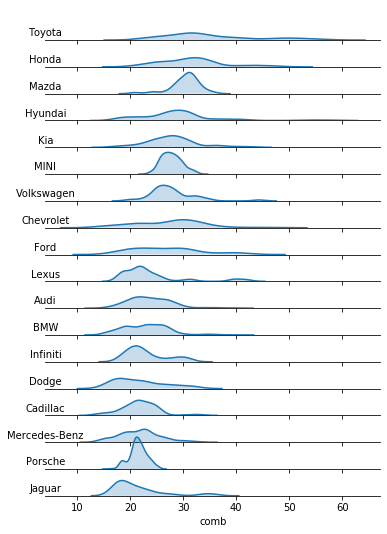

In [30]:
# adjust the spacing of subplots with gridspec_kws
g = sb.FacetGrid(data = fuel, row = 'make', height = 0.5, aspect = 12, row_order = order, gridspec_kws = {'hspace' : -0.2})
g.map(sb.kdeplot, 'comb', shade = True)

g.set(yticks=[])
g.despine(left=True)

# set the transparency of each subplot to full
g.map(lambda **kwargs: plt.gca().patch.set_alpha(0))

# remove subplot titles and write in new labels
def label_text(x, **kwargs):
    plt.text(4, 0.02, x.iloc[0], ha = 'center', va = 'bottom')
g.map(label_text, 'make')
g.set_xlabels('comb')
g.set_titles('');

#The final ridgeline plot looks like this, where we can see the distribution of our numeric variable on each category, sorted by mean:

We make clever use of the FacetGrid object's `map` function to perform the plot modifications. Previously, you've seen `map` used where the first argument is a plotting function, the following arguments are positional variable strings, and any additional arguments are keyword arguments for the plotting function. In actuality, you can set any function as the first argument, which will be applied to each facet. To apply the transparency using `map`, I set up an anonymous lambda function that gets the current Axes (`gca`), selects its background (`patch`), and sets its transparency to full.

As for the second `map` argument, it sends a pandas Series to the function specified by the first argument. This Series is filtered to include only the column specified by the second `map` argument, with only the rows appropriate for each facet. In this case, I exploit the fact that the 'make' column is filled with copies of the categorical feature string to specify the `text` string, with hardcoded positional values appropriate to the plot. (`map` also sends a few general keyword arguments like 'color' automatically to the specified function, hence the need for `**kwargs` to capture them despite not specifying any myself.) One downside to this approach is that the x-axis labels get replaced with 'make' after the `map` call, thus requiring the addition of a `set_xlabels` function call to reset the string.

# Encoding Practice

In this notebook, you'll be working with the Pokémon dataset from earlier.

**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

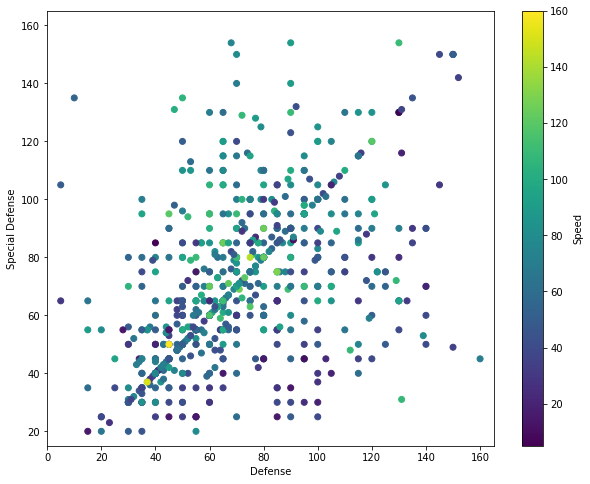

In [31]:
plt.figure(figsize = [10,8])
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense', c = 'speed')
plt.colorbar(label = 'Speed')
plt.xlim(0,165)
plt.ylim(15,165)
plt.xlabel('Defense')
plt.ylabel('Special Defense');

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [32]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [33]:
pokemon_sub = pkmn_types.query('type == "fairy" | type == "dragon"')
pokemon_sub.shape

(92, 14)

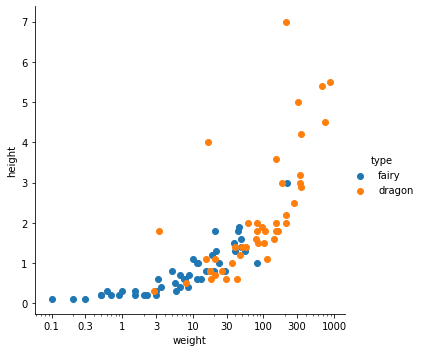

In [34]:
g = sb.FacetGrid(data = pokemon_sub, hue = 'type', height = 5)
g.map(plt.scatter, 'weight','height')
g.set(xscale = 'log')
x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks = x_ticks, xticklabels = x_ticks)
g.add_legend();


# Adapted Plot Practice

In [35]:
VClass = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = VClass)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

F:\Anaconda3\envs\py3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


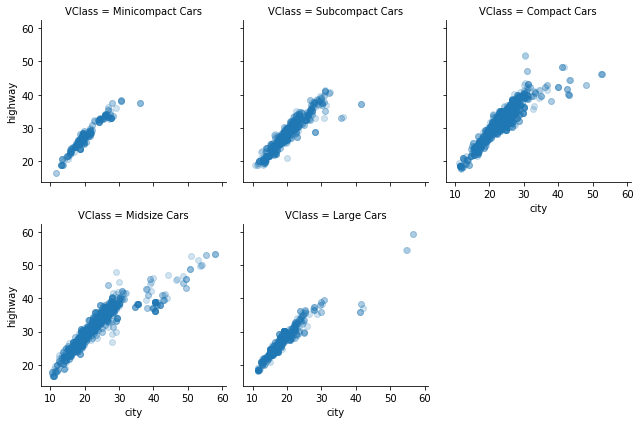

In [36]:
g = sb.FacetGrid(data = fuel_econ, col = 'VClass', size = 3, col_wrap = 3)
g.map(plt.scatter, 'city', 'highway', alpha = 1/5);

**Task 2**: Plot the relationship between engine size ('displ', in meters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

In [37]:
fuel_sub = fuel_econ.query('fuelType == "Premium Gasoline" | fuelType == "Regular Gasoline"')

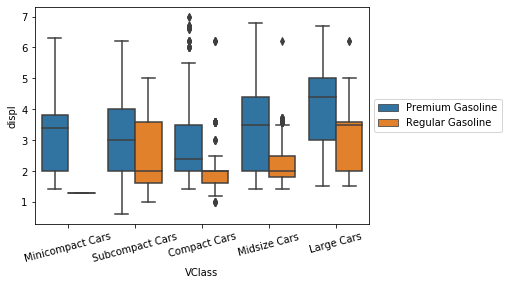

In [38]:
sb.boxplot(data = fuel_sub, x = 'VClass', y = 'displ', hue = 'fuelType')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15);